In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *

from twinLab import *

In [2]:
parameters = pd.read_csv('parameters.csv')

In [3]:
#n_samples = parameters.shape[0]
#
#model_output = []
#
#for i in range(n_samples):
#    s = pd.read_csv('samples/sample_{}.csv'.format(i))[['temperature', 'desorption_rate']]
#    model_output.append(s)
#    
#grid_projection = Linear1dProjection()
#grid, samples_grid = grid_projection.transform(model_output)
#
#np.savetxt('grid.csv', grid)
#np.savetxt('samples_grid.csv', samples_grid)

In [4]:
grid = np.loadtxt('grid.csv')
samples_grid = np.loadtxt('samples_grid.csv')

In [5]:
#estimator = MultiOutputGPRegressor(GaussianProcessRegressor(kernel=RBF(length_scale_bounds=(0.1,10))), n_jobs=-1)
estimator = IndependentMultiGPModel(gpmodel=ZeroMeanExactGPModel, n_iter=200)
input_transformers = [StandardScaler()]
output_transformers = [StandardScaler(), TruncatedSVD(7), StandardScaler()]

pipeline = Pipeline(estimator, input_transformers, output_transformers)

In [6]:
training_proportion = 0.8
n_train = int(training_proportion*4096)

indices = np.random.permutation(parameters.shape[0])
train_idx, test_idx = indices[:n_train], indices[n_train:]

x_train = parameters.values[train_idx,:]
y_train = samples_grid[train_idx,:]

x_test = parameters.values[test_idx,:]
y_test = samples_grid[test_idx,:]

pipeline.fit(x_train, y_train)


Training GP 1/7...
Iter 20/200 - Loss: 0.325   lengthscale: 1.812   noise: 0.134
Iter 40/200 - Loss: -0.691   lengthscale: 2.608   noise: 0.017
Iter 60/200 - Loss: -1.682   lengthscale: 3.092   noise: 0.002
Iter 68/200 - Loss: -2.035   lengthscale: 3.266   noise: 0.001

Training GP 2/7...
Iter 20/200 - Loss: 0.328   lengthscale: 1.794   noise: 0.134
Iter 40/200 - Loss: -0.680   lengthscale: 2.489   noise: 0.017
Iter 60/200 - Loss: -1.667   lengthscale: 3.027   noise: 0.002
Iter 68/200 - Loss: -2.019   lengthscale: 3.267   noise: 0.001

Training GP 3/7...
Iter 20/200 - Loss: 0.344   lengthscale: 1.745   noise: 0.134
Iter 40/200 - Loss: -0.659   lengthscale: 2.477   noise: 0.017
Iter 60/200 - Loss: -1.622   lengthscale: 3.036   noise: 0.002
Iter 68/200 - Loss: -1.948   lengthscale: 3.287   noise: 0.001

Training GP 4/7...
Iter 20/200 - Loss: 0.368   lengthscale: 1.696   noise: 0.134
Iter 40/200 - Loss: -0.606   lengthscale: 2.370   noise: 0.017
Iter 60/200 - Loss: -1.496   lengthscale: 

3752


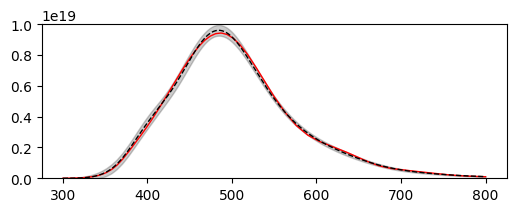

3511


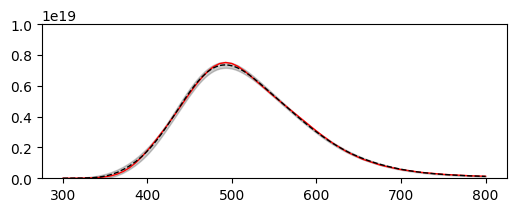

3934


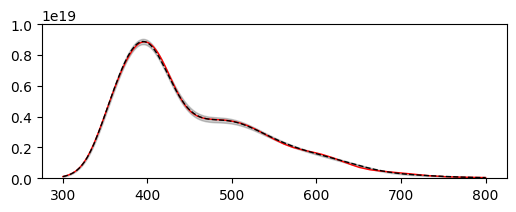

3005


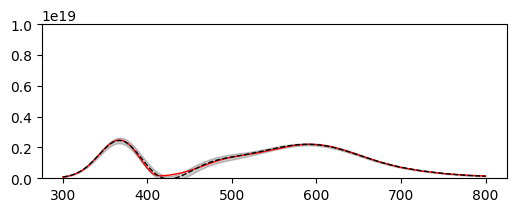

316


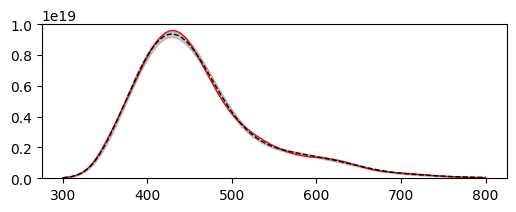

2996


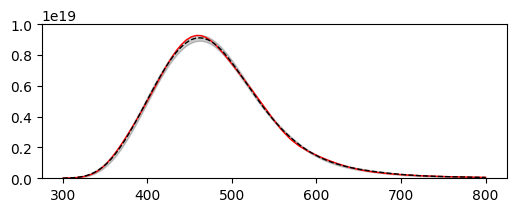

3918


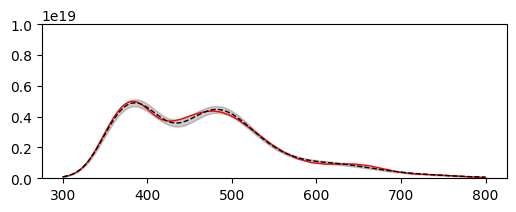

3230


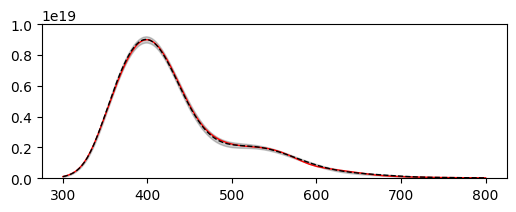

3304


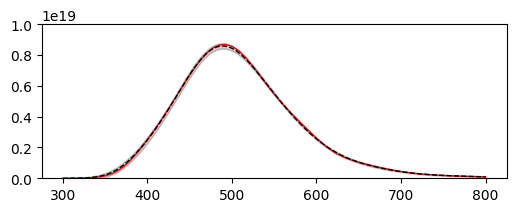

1586


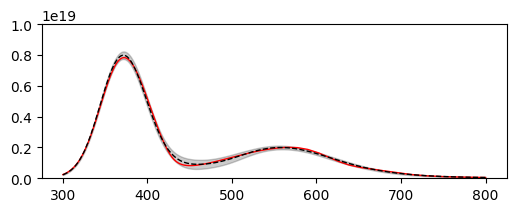

In [8]:
for i in range(10):
    
    idx = np.random.choice(test_idx)
    print(idx)
    
    plt.figure(figsize=(6,2))
    plt.plot(grid, samples_grid[idx,:], c='r', linewidth=1)
    
    mean, stdev = pipeline.predict(parameters.values[idx,:][np.newaxis,:])
    #mean, stdev = pipeline.predict(parameters_norm[idx,:][np.newaxis,:])
    plt.plot(grid, mean.flatten(), c='k', linewidth=1, linestyle='dashed')
    plt.fill_between(grid, mean.flatten()-1.96*stdev.flatten(), mean.flatten()+1.96*stdev.flatten(), alpha=0.2, color='k')
    plt.ylim(0, 1e19)
    
    #plt.savefig('plots/sample{}.pdf'.format(i), bbox_inches='tight')
    plt.show()

In [8]:
#pipeline.save('pipeline.pickle')